<a href="https://colab.research.google.com/github/Sathvik-Srivathsan/Tensorflow/blob/main/Tensorflow_1_Simple_Model_to_predict_car_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [20]:
data = pd.read_csv("car train.csv")
print(data.shape)
print(data.head())

#Converting the data to tensors
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, tf.float32)
tensor_data = tf.random.shuffle(tensor_data)

#Datasets for training, validation and testing
X = tensor_data[:,3:-1]
y = tensor_data[:,-1]
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

#Normalization
normalizer = Normalization()

#Traininig Data
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

#Validation Data
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE) # Changed from train_dataset to val_dataset

#Testing Data
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

print("Training Data:\n", X_train.shape, y_train.shape)
print("Validation Data:\n", X_val.shape, y_val.shape)
print("Testing Data:\n", X_test.shape, y_test.shape)

(1000, 12)
   v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5  
Training Data:
 (800, 8) (800,)
Validation Data:
 (100, 8) (100,)
Testing Data:
 (100, 8) (100,)


In [30]:
#Initializaing 5 layers; 8 input layers, 3 hidden layers (128 units, 128 units, 128 units) and 1 output layer
model = tf.keras.Sequential([
                             InputLayer(input_shape = (8,)),
                             normalizer,
                             Dense(128, activation = "leaky_relu"),
                             Dense(128, activation = "leaky_relu"),
                             Dense(128, activation = "leaky_relu"),
                             Dense(1),
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_5 (Normalization)      │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,322 (134.07 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 17 (72.00 B)

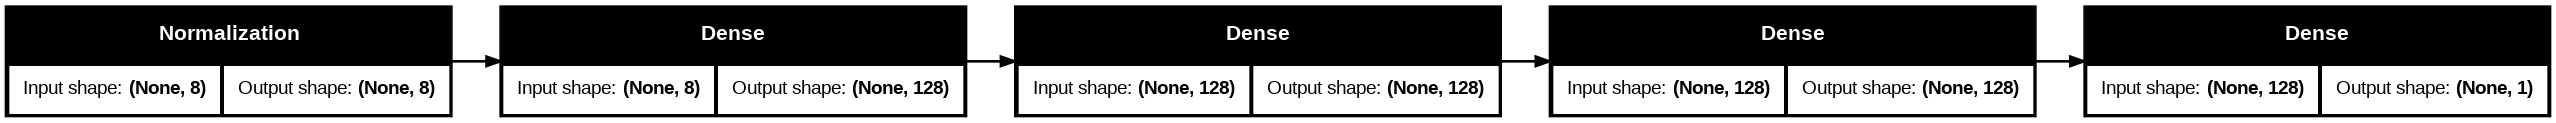

In [17]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes=True, rankdir="LR", expand_nested=True, dpi=96)

In [39]:
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = MeanAbsoluteError(),
              metrics = [RootMeanSquaredError()])

history = model.fit(train_dataset, validation_data=val_dataset, epochs = 500, verbose = 5)

Epoch 1/500
25/25 - 2s - 62ms/step - loss: 71456.8594 - root_mean_squared_error: 90554.3281 - val_loss: 60912.8008 - val_root_mean_squared_error: 76184.5625
Epoch 2/500
25/25 - 0s - 3ms/step - loss: 61433.1055 - root_mean_squared_error: 75296.1484 - val_loss: 55068.1211 - val_root_mean_squared_error: 69638.7344
Epoch 3/500
25/25 - 0s - 3ms/step - loss: 62496.2969 - root_mean_squared_error: 77368.6875 - val_loss: 57829.2109 - val_root_mean_squared_error: 72991.7656
Epoch 4/500
25/25 - 0s - 2ms/step - loss: 61280.5312 - root_mean_squared_error: 75659.4844 - val_loss: 56962.5781 - val_root_mean_squared_error: 72065.5312
Epoch 5/500
25/25 - 0s - 2ms/step - loss: 63346.8203 - root_mean_squared_error: 78468.2656 - val_loss: 58169.3242 - val_root_mean_squared_error: 73349.4297
Epoch 6/500
25/25 - 0s - 5ms/step - loss: 61945.5156 - root_mean_squared_error: 76442.3984 - val_loss: 57896.3359 - val_root_mean_squared_error: 73212.3125
Epoch 7/500
25/25 - 0s - 6ms/step - loss: 63320.3711 - root_mea

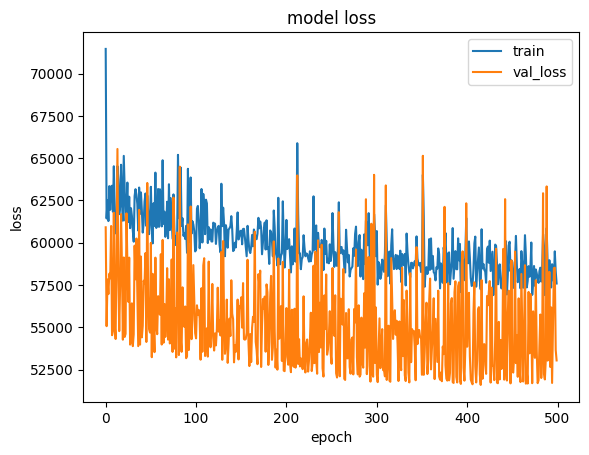

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

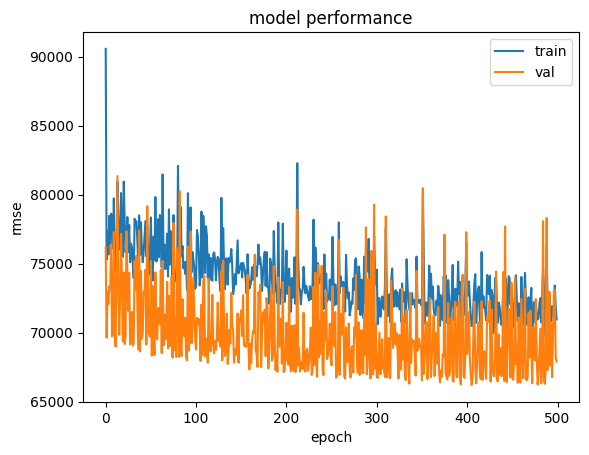

In [41]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 53921.7852 - root_mean_squared_error: 66140.9766 


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


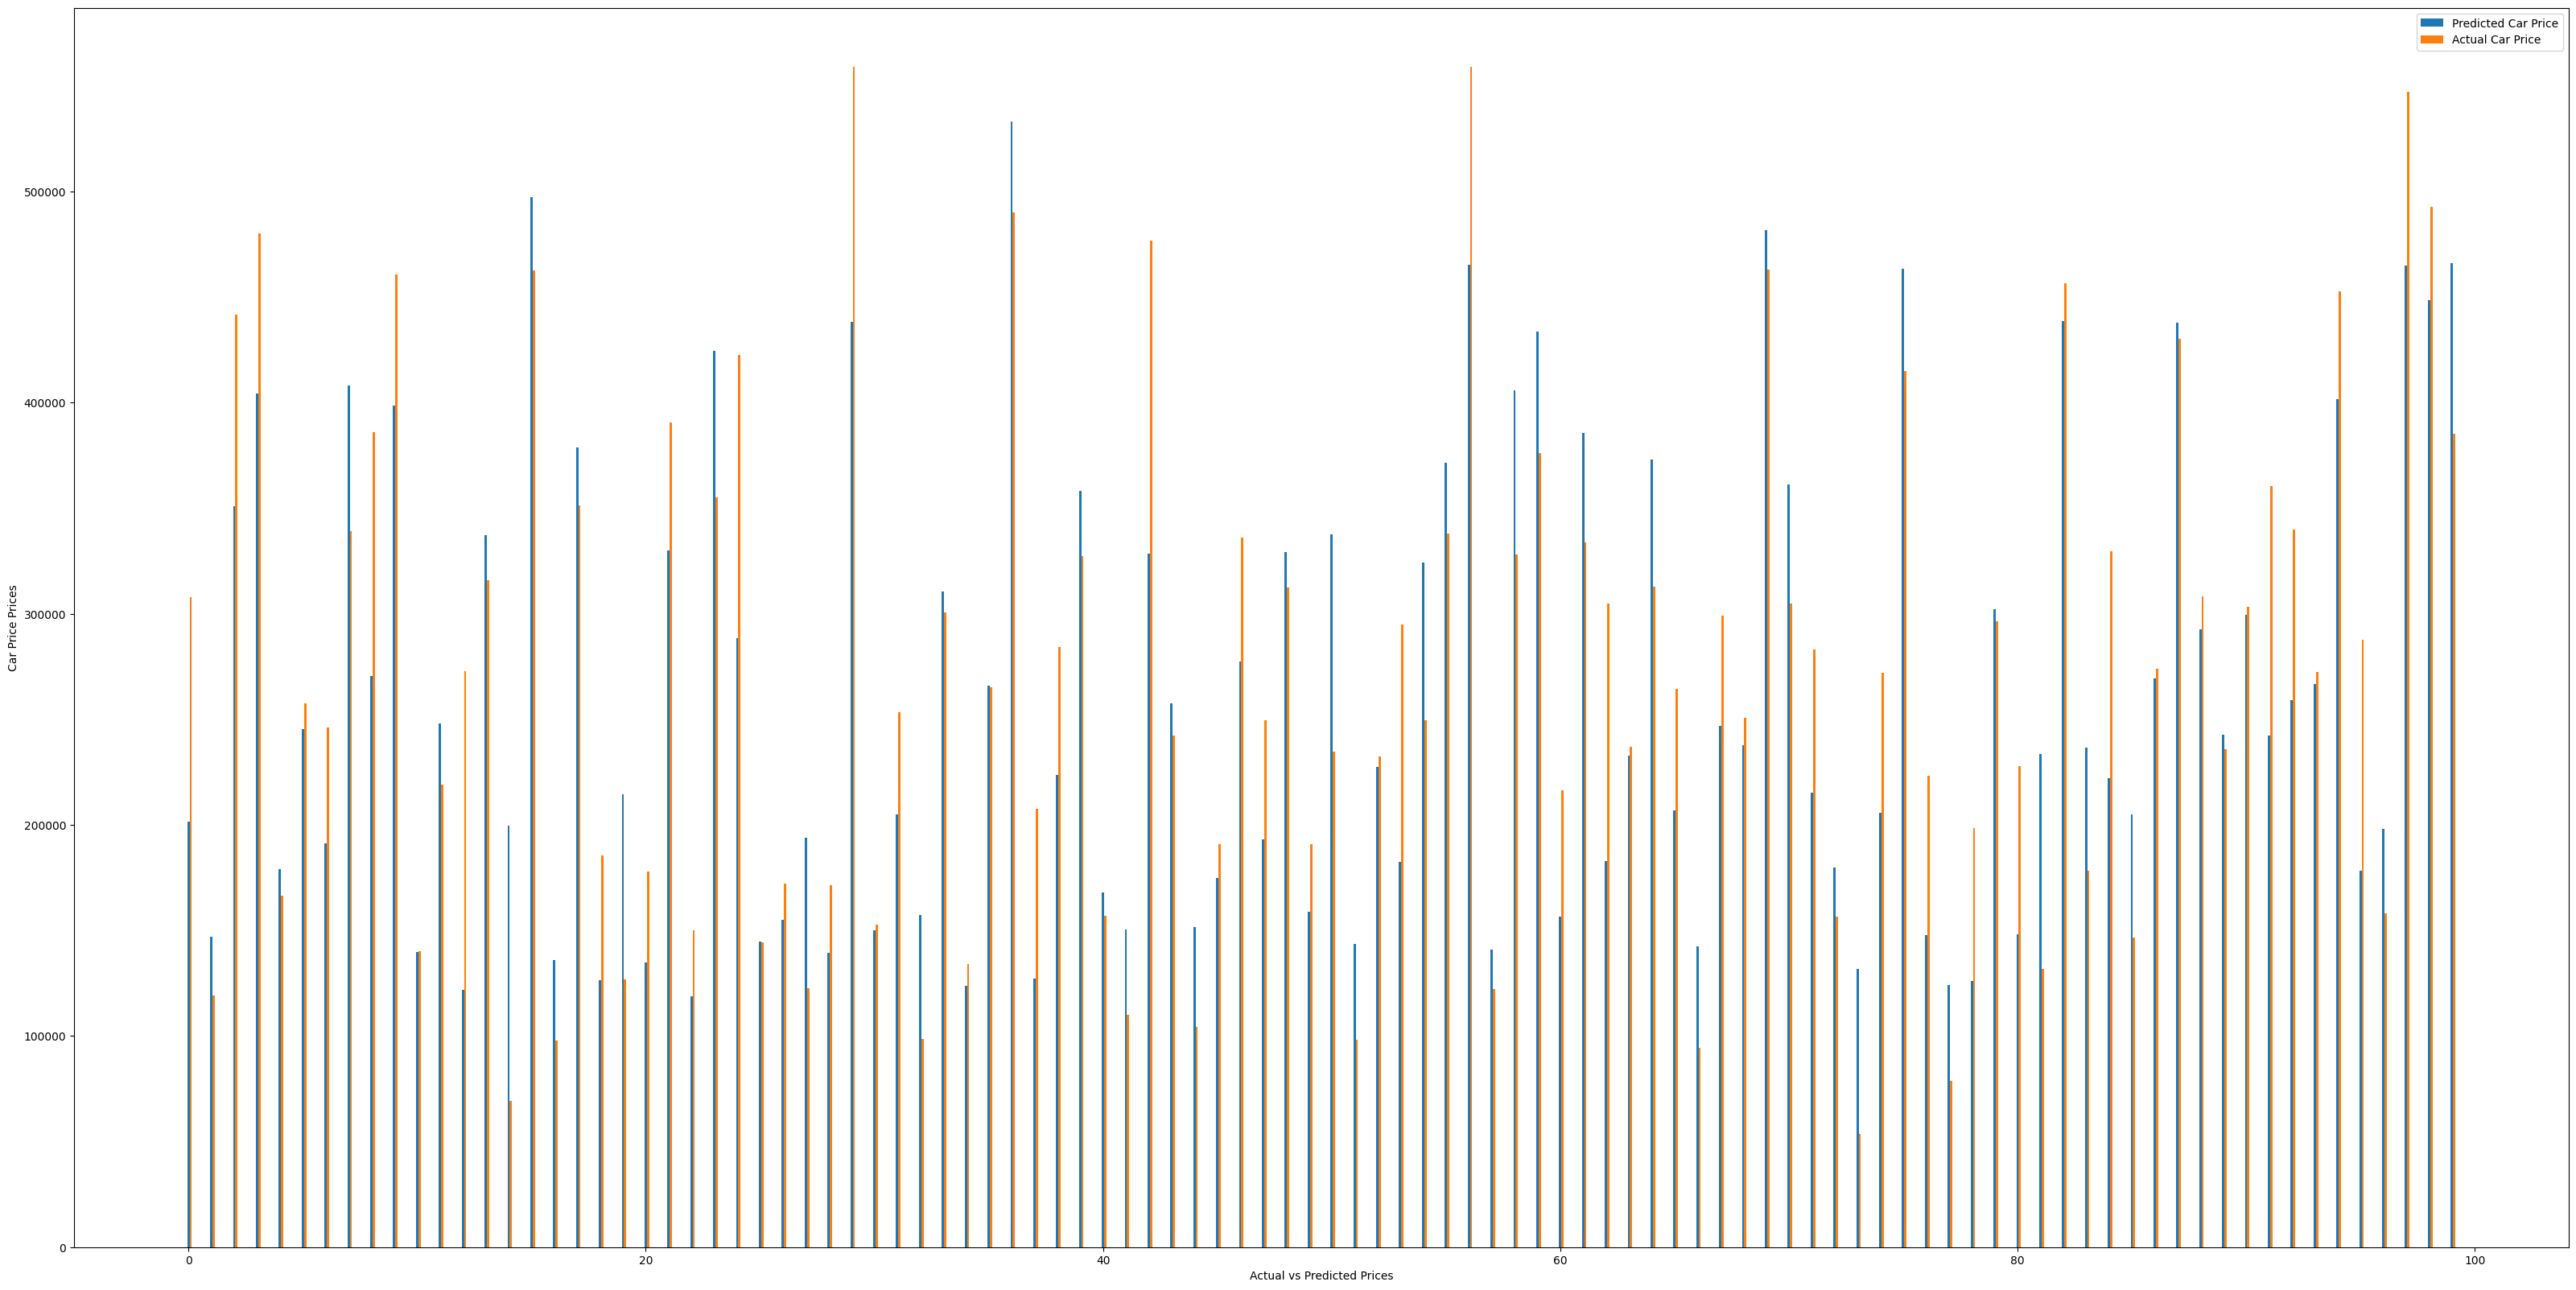

In [42]:
model.evaluate(X_test,y_test)
y_true = list(y_test[:].numpy())
y_pred = list(model.predict(X_test)[:,0])

ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 0.1

plt.bar(ind, y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')
plt.legend()
plt.show()